In [ ]:
import pickle
import numpy as np
from sklearn import ensemble
import pandas as pd
import datetime


In [ ]:
df = pd.DataFrame(pickle.load(open('Dataframe pickle.pkl','rb')))

In [ ]:
df.head(1)

,Open,High,Low,Close,Aroon Oscillator,Average True Range,Average Price 9,Bband upper_band,Bbands middle_band,Bbands lower_band,...,hash.rev_8,addr.act.rcv.cnt_8,exch.bitmex.flow.in.ntv_8,exch.bitmex.flow.out.ntv_8,exch.sply.bittrex.ntv_8,exch.sply.gemini_8,exch.bitstamp.flow.net.ntv_8,exch.bittrex.flow.out.ntv_8,Change percentage_8,Weekday
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,
2014-01-01,746.2226,775.0,740.18292,775.0,100.0,78.52641,759.10138,902.13498,716.82007,531.50515,...,0.003252,131055.0,0.0,0.0,0.0,0.0,-6557.438028,0.0,1.08757,3


In [ ]:
df.index = df["Unnamed: 0.1"].map(lambda x : datetime.datetime.strptime(x,"%Y-%m-%d"))
df.drop("Unnamed: 0", axis =1, inplace = True)
df.drop("Unnamed: 0.1", axis =1, inplace = True)

In [ ]:
df.columns[328]

'Range3'

In [ ]:
df.columns[330:2955]

Index(['Open', 'High', 'Low', 'Close', 'Aroon Oscillator',
       'Average True Range', 'Average Price 9', 'Bband upper_band',
       'Bbands middle_band', 'Bbands lower_band',
       ...
       'addr.act.rcv.cnt', 'exch.bitmex.flow.in.ntv',
       'exch.bitmex.flow.out.ntv', 'exch.sply.bittrex.ntv', 'exch.sply.gemini',
       'exch.bitstamp.flow.net.ntv', 'exch.bittrex.flow.out.ntv',
       'Change percentage', 'Range3', 'Range'],
      dtype='object', length=330)

In [ ]:
df1 = df.copy()

selec_columns = [i for i in df1.columns][:330]

df1 = df1.drop(selec_columns, axis =1) #seleccionamos las columnas

df1 = df1['2014':]
df = df['2014':]

X_train = df1[:'2021-05-01']
y_train = df['Range3'][:'2021-05-01']

In [ ]:
X_train.head(1)


,Change percentage_7,Open_8,High_8,Low_8,Close_8,Aroon Oscillator_8,Average True Range_8,Average Price 9_8,Bband upper_band_8,Bbands middle_band_8,...,hash.rev_8,addr.act.rcv.cnt_8,exch.bitmex.flow.in.ntv_8,exch.bitmex.flow.out.ntv_8,exch.sply.bittrex.ntv_8,exch.sply.gemini_8,exch.bitstamp.flow.net.ntv_8,exch.bittrex.flow.out.ntv_8,Change percentage_8,Weekday
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,
2014-01-01,14.314938,661.95831,668.74591,646.81659,647.33447,-57.14286,113.68295,656.21382,1075.09628,784.83939,...,0.003252,131055.0,0.0,0.0,0.0,0.0,-6557.438028,0.0,1.08757,3


In [ ]:
X_test = df1['2021-05-02':]
y_test = df['Range3']['2021-05-02':]

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators=1000,max_depth=3, learning_rate=0.01, verbosity=1,booster='gbtree',reg_alpha =0.005, reg_lambda=0.005, colsample_bytree=0.1, objective='multi:softprob')
xgb.fit(X_train,y_train) #parametros modelo

XGBClassifier(colsample_bytree=0.1, learning_rate=0.01, n_estimators=1000,
              objective='multi:softprob', reg_alpha=0.005, reg_lambda=0.005)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


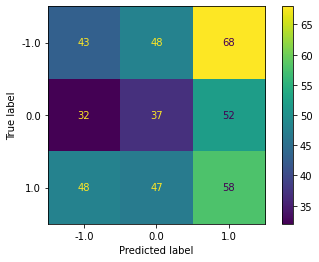

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


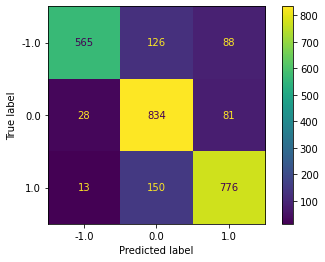

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb,X_train,y_train)

In [ ]:
yhat = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

f1_score(yhat, y_test, average = 'weighted')

0.31986142864345085

In [ ]:
dfimport = pd.DataFrame(xgb.feature_importances_)

dfimport


array([0.        , 0.00023998, 0.00072388, ..., 0.00047218, 0.00053734,
       0.00054875], dtype=float32)